## Extracción y Analisis de los Datos

In [111]:
#IMPORTAR CONJUNTO DE LIBRERÍAS
#Tratamiento de datos
import pandas as pd
import numpy as np

#Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

#Análisis estadísticos
#!pip install empiricaldist
import empiricaldist
import scipy
import statsmodels.api as sm
 
 
#Librerías de ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

import sklearn.compose
import sklearn.impute
import sklearn.preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.neighbors import KNeighborsRegressor

#Advertencias
import warnings
warnings.filterwarnings('ignore')

In [112]:
df = pd.read_csv('salaries.csv')


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16494 non-null  int64 
 1   experience_level    16494 non-null  object
 2   employment_type     16494 non-null  object
 3   job_title           16494 non-null  object
 4   salary              16494 non-null  int64 
 5   salary_currency     16494 non-null  object
 6   salary_in_usd       16494 non-null  int64 
 7   employee_residence  16494 non-null  object
 8   remote_ratio        16494 non-null  int64 
 9   company_location    16494 non-null  object
 10  company_size        16494 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [114]:
df.head(15)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M
5,2024,MI,FT,Data Science Manager,180000,USD,180000,US,0,US,M
6,2024,SE,FT,Business Intelligence Engineer,202800,USD,202800,US,0,US,M
7,2024,SE,FT,Business Intelligence Engineer,115000,USD,115000,US,0,US,M
8,2024,SE,FT,Data Architect,80000,GBP,100000,GB,0,GB,M
9,2024,SE,FT,Data Architect,45000,GBP,56250,GB,0,GB,M


In [115]:
df.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,16494.000000,16494,16494,16494,1.649400e+04,16494,16494.000000,16494,16494.000000,16494,16494
unique,NaN,4,4,155,NaN,23,NaN,88,NaN,77,3
top,NaN,SE,FT,Data Engineer,NaN,USD,NaN,US,NaN,US,M
freq,NaN,10652,16414,3456,NaN,15254,NaN,14427,NaN,14478,15268
mean,2023.224991,NaN,NaN,NaN,1.637878e+05,NaN,149713.575725,NaN,32.044986,NaN,NaN
std,0.713405,NaN,NaN,NaN,3.406017e+05,NaN,68516.136918,NaN,46.260201,NaN,NaN
min,2020.000000,NaN,NaN,NaN,1.400000e+04,NaN,15000.000000,NaN,0.000000,NaN,NaN
25%,2023.000000,NaN,NaN,NaN,1.020000e+05,NaN,101517.500000,NaN,0.000000,NaN,NaN
50%,2023.000000,NaN,NaN,NaN,1.422000e+05,NaN,141300.000000,NaN,0.000000,NaN,NaN
75%,2024.000000,NaN,NaN,NaN,1.873422e+05,NaN,185900.000000,NaN,100.000000,NaN,NaN


In [116]:
df.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,16494,16494,16494,16494,16494,16494,16494
unique,4,4,155,23,88,77,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,10652,16414,3456,15254,14427,14478,15268


In [117]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [118]:
df['employee_residence'].unique()  # los paises latinoamericanos presentes son MX y AR

array(['AU', 'US', 'GB', 'CA', 'NL', 'LT', 'DK', 'FR', 'ZA', 'NZ', 'AR',
       'ES', 'KE', 'LV', 'GE', 'IN', 'DE', 'IL', 'FI', 'AT', 'HR', 'BR',
       'CH', 'AE', 'GR', 'PL', 'SA', 'UA', 'EG', 'PH', 'TR', 'OM', 'MX',
       'PT', 'BA', 'IT', 'IE', 'EE', 'MT', 'LB', 'RO', 'HU', 'VN', 'NG',
       'CZ', 'PK', 'UG', 'CO', 'SI', 'MU', 'AM', 'TH', 'KR', 'QA', 'RU',
       'TN', 'GH', 'BE', 'AD', 'EC', 'PE', 'MD', 'NO', 'UZ', 'JP', 'HK',
       'CF', 'SG', 'SE', 'KW', 'CY', 'IR', 'AS', 'CN', 'CR', 'CL', 'PR',
       'BO', 'DO', 'ID', 'MY', 'HN', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'LU'],
      dtype=object)

### Grafica de tipos de contratos 

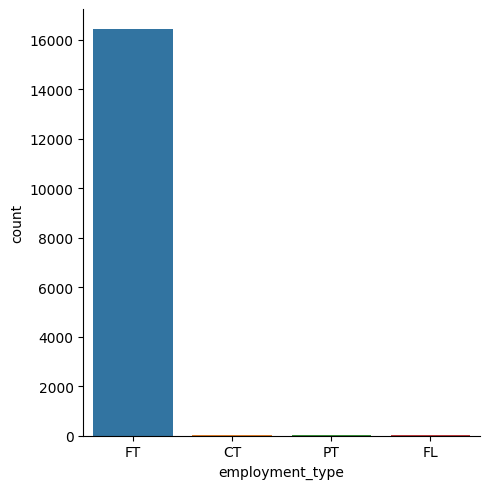

In [119]:
sb.catplot(data = df, x = 'employment_type', kind = 'count', palette = "tab10")  
plt.show()

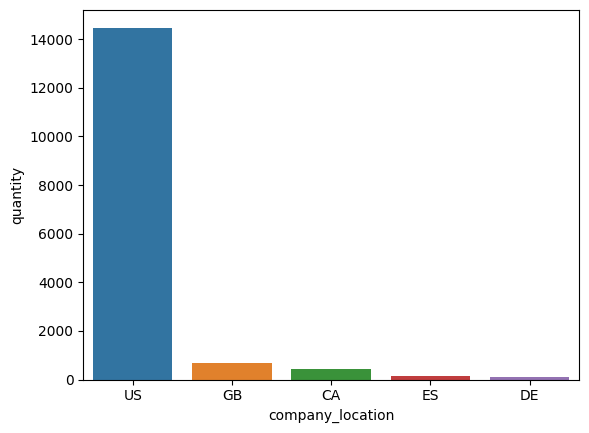

In [120]:

df_country = df.groupby(['company_location'])['company_location'].count().reset_index(name='quantity')
df_country.sort_values('quantity', ascending=False, inplace=True)
df_country = df_country[df_country['quantity'] > 100]
sb.barplot(data = df_country, x = 'company_location', y = 'quantity', palette = "tab10")  
plt.show()


In [121]:
df_country.head(5)

,company_location,quantity
74,US,14478
27,GB,694
11,CA,455
24,ES,133
18,DE,105


In [122]:
df_proc = df.copy()

In [123]:
df_proc.isnull().any()

work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

### filtros

In [124]:

employment_type = 'FT' #se hace este filtro ya que en la grafica de tipo de contratos se observa que el contrato FT es el mas comun
company_locations = ['US', 'CA'] #se filtra ya que para nuestro analisis solo nos interesa los paises de US y CA
mascara1 = (df_proc['employment_type'] == employment_type) & (df_proc['company_location'].isin(company_locations))
df_proc_filtrado = df_proc[mascara1]
df_proc_filtrado

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M
5,2024,MI,FT,Data Science Manager,180000,USD,180000,US,0,US,M
6,2024,SE,FT,Business Intelligence Engineer,202800,USD,202800,US,0,US,M
7,2024,SE,FT,Business Intelligence Engineer,115000,USD,115000,US,0,US,M
10,2024,SE,FT,Data Analyst,90000,CAD,69230,CA,0,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
16486,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
16488,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L
16489,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16490,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L


In [125]:
df_proc_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14881 entries, 4 to 16491
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14881 non-null  int64 
 1   experience_level    14881 non-null  object
 2   employment_type     14881 non-null  object
 3   job_title           14881 non-null  object
 4   salary              14881 non-null  int64 
 5   salary_currency     14881 non-null  object
 6   salary_in_usd       14881 non-null  int64 
 7   employee_residence  14881 non-null  object
 8   remote_ratio        14881 non-null  int64 
 9   company_location    14881 non-null  object
 10  company_size        14881 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [126]:
df_proc_filtrado.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,14881.000000,14881,14881,14881,1.488100e+04,14881,14881.000000,14881,14881.000000,14881,14881
unique,NaN,4,1,138,NaN,6,NaN,35,NaN,2,3
top,NaN,SE,FT,Data Engineer,NaN,USD,NaN,US,NaN,US,M
freq,NaN,10023,14881,3146,NaN,14797,NaN,14384,NaN,14429,14027
mean,2023.262214,NaN,NaN,NaN,1.580642e+05,NaN,156797.019354,NaN,31.257980,NaN,NaN
std,0.668454,NaN,NaN,NaN,1.165127e+05,NaN,65673.349819,NaN,46.238084,NaN,NaN
min,2020.000000,NaN,NaN,NaN,1.500000e+04,NaN,15000.000000,NaN,0.000000,NaN,NaN
25%,2023.000000,NaN,NaN,NaN,1.109000e+05,NaN,110600.000000,NaN,0.000000,NaN,NaN
50%,2023.000000,NaN,NaN,NaN,1.475000e+05,NaN,147500.000000,NaN,0.000000,NaN,NaN
75%,2024.000000,NaN,NaN,NaN,1.905000e+05,NaN,190027.000000,NaN,100.000000,NaN,NaN


### Salario en dolares por nivel de experiencia

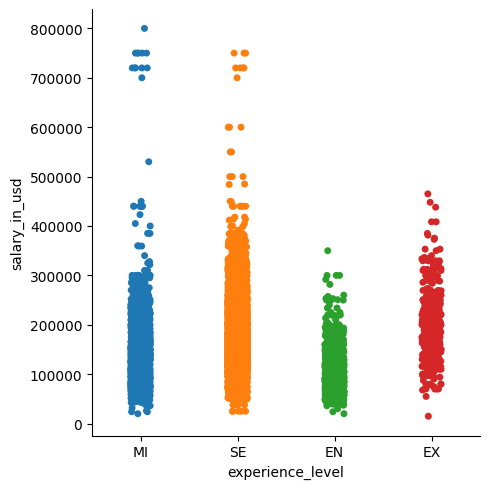

In [127]:
sb.catplot(data = df_proc_filtrado, x = 'experience_level', y = 'salary_in_usd',palette = "tab10")
plt.show()

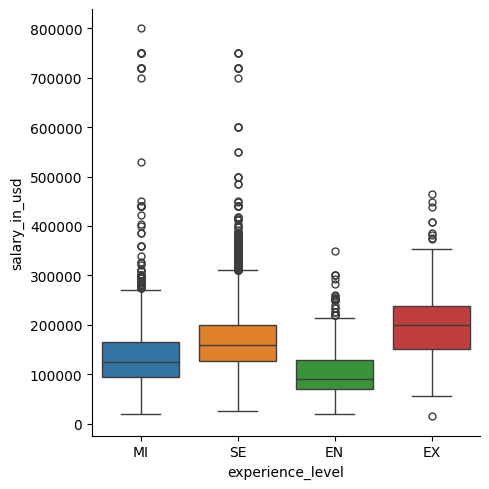

In [128]:
sb.catplot(data = df_proc_filtrado, x = 'experience_level', y = 'salary_in_usd',palette = "tab10", kind='box')
plt.show()

### Cantidad de trabajos por nivel de experiencia

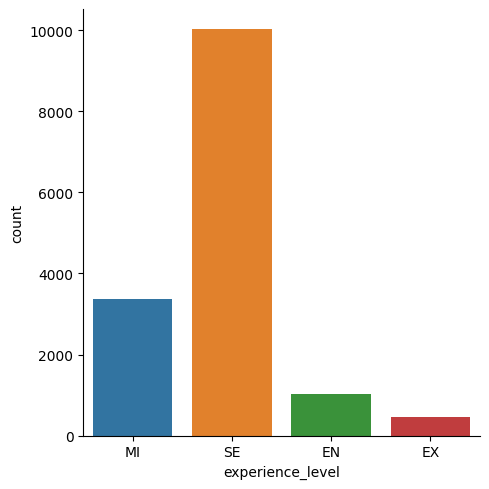

In [129]:
sb.catplot(data = df_proc_filtrado, x = 'experience_level', kind = 'count', palette = "tab10")
plt.show()

### Cantidad de ofertas por año

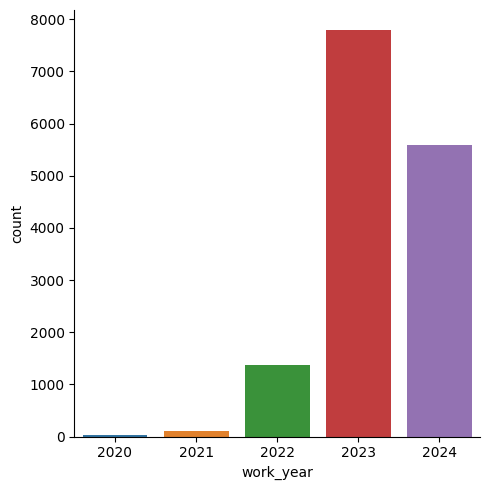

In [130]:
sb.catplot(data = df_proc_filtrado, x = 'work_year', kind='count',palette = "tab10")
plt.show()

### Cantidad de trabajos por tamaño de la compañia

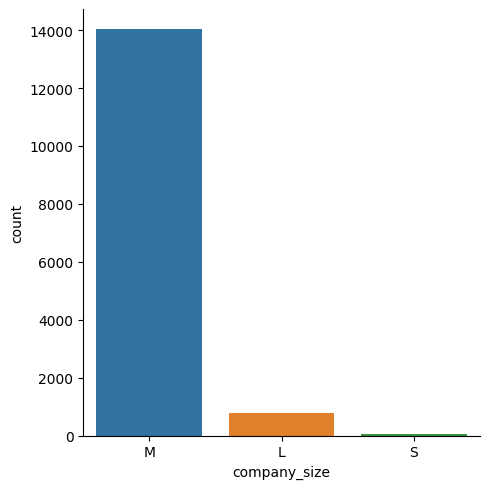

In [131]:
sb.catplot(data = df_proc_filtrado, x = 'company_size', kind = 'count', palette = "tab10")  #Esta columna se puede eliminar
plt.show()

### Cantidad de empleos dependiendo de la modalidad

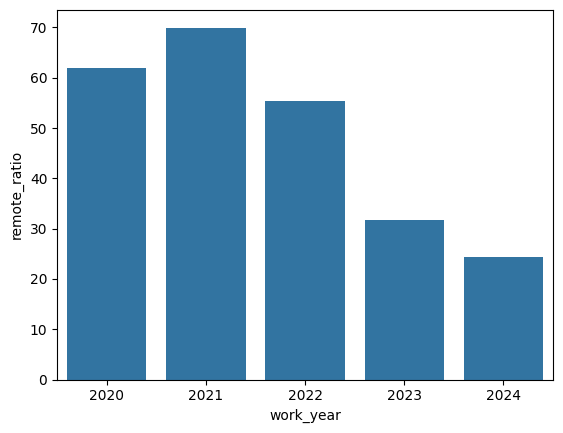

In [132]:
# Agrupar por año y calcular la media del remote_ratio
remote_proportion = df.groupby('work_year')['remote_ratio'].mean().reset_index()
# Gráfico de barras
sb.barplot(x='work_year', y='remote_ratio', data=remote_proportion)
plt.show()

### Se borra columna employment_type ya que filtramos los tipos de contrato por FT

In [133]:
df_proc_filtrado = df_proc_filtrado.drop(['employment_type','salary_currency','salary'], axis=1)
df_proc_filtrado

,work_year,experience_level,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
4,2024,MI,Data Science Manager,240000,US,0,US,M
5,2024,MI,Data Science Manager,180000,US,0,US,M
6,2024,SE,Business Intelligence Engineer,202800,US,0,US,M
7,2024,SE,Business Intelligence Engineer,115000,US,0,US,M
10,2024,SE,Data Analyst,69230,CA,0,CA,M
...,...,...,...,...,...,...,...,...
16486,2021,MI,Applied Machine Learning Scientist,423000,US,50,US,L
16488,2021,SE,Data Specialist,165000,US,100,US,L
16489,2020,SE,Data Scientist,412000,US,100,US,L
16490,2021,MI,Principal Data Scientist,151000,US,100,US,L


# Preguntas

### Pregunta 1: ¿Cuales trabajo con mejor salario promedio en el 2023 y 2024?

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Head of Data Science'),
  Text(0, 1, 'Head of Machine Learning'),
  Text(0, 2, 'AWS Data Architect'),
  Text(0, 3, 'Head of Data'),
  Text(0, 4, 'AI Architect')])

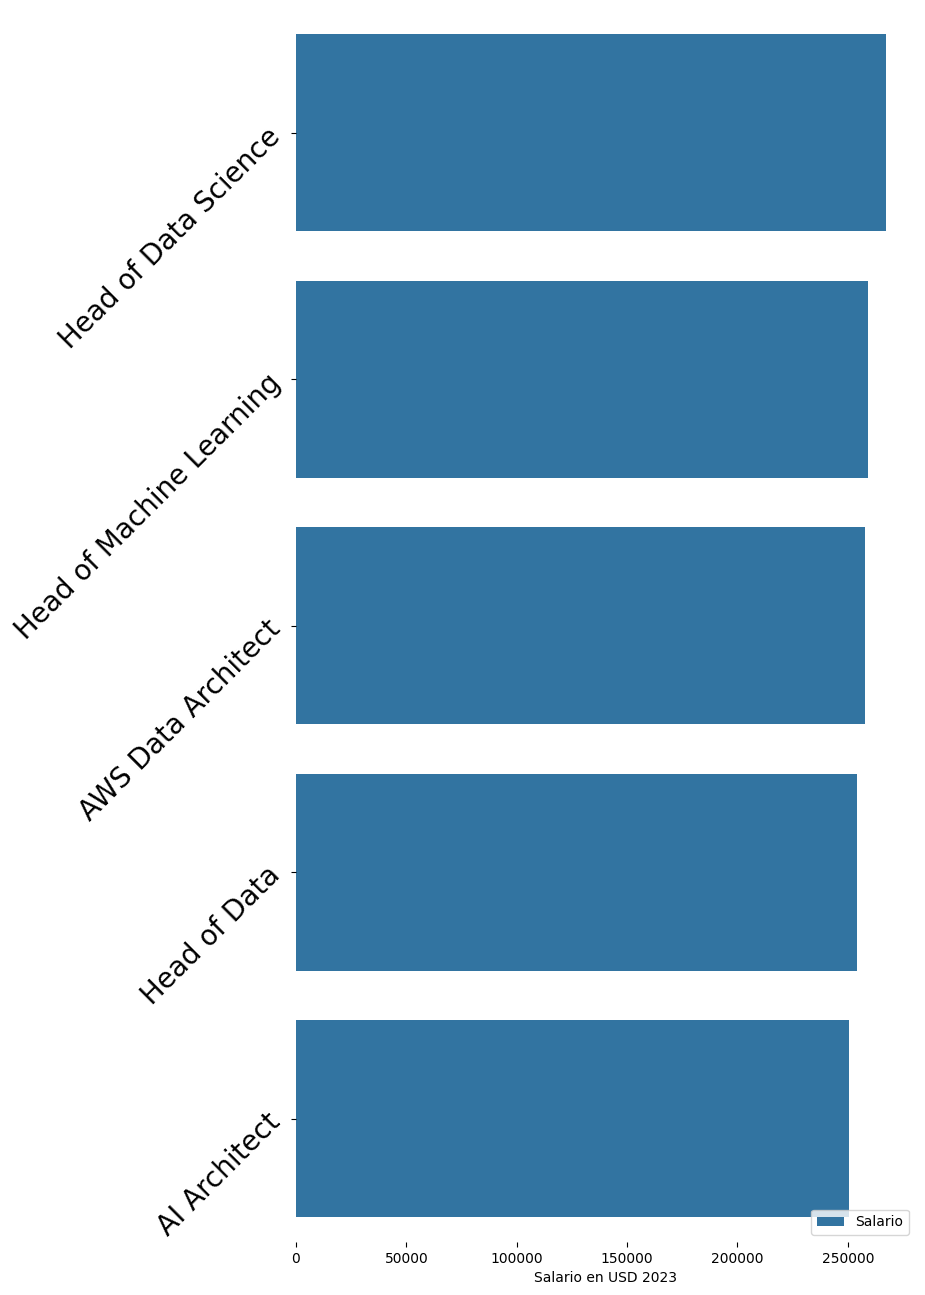

In [134]:
f, ax = plt.subplots(figsize=(8, 16))


mascara1 = (df_proc_filtrado['work_year'] == 2023)
df_res1 = df_proc_filtrado[mascara1]

df_res1 = df_res1.groupby(['job_title'])['salary_in_usd'].mean().reset_index()

df_res1.sort_values('salary_in_usd', ascending=False, inplace=True)
sb.barplot(x="salary_in_usd", y="job_title", data=df_res1.head(5),
            label="Salario")

ax.tick_params(axis='y', labelsize='large')
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Salario en USD 2023")
sb.despine(left=True, bottom=True)
plt.yticks(rotation=45, fontsize=20)



([0, 1, 2, 3, 4],
 [Text(0, 0, 'Head of Machine Learning'),
  Text(0, 1, 'Managing Director Data Science'),
  Text(0, 2, 'AI Architect'),
  Text(0, 3, 'Machine Learning Infrastructure Engineer'),
  Text(0, 4, 'Prompt Engineer')])

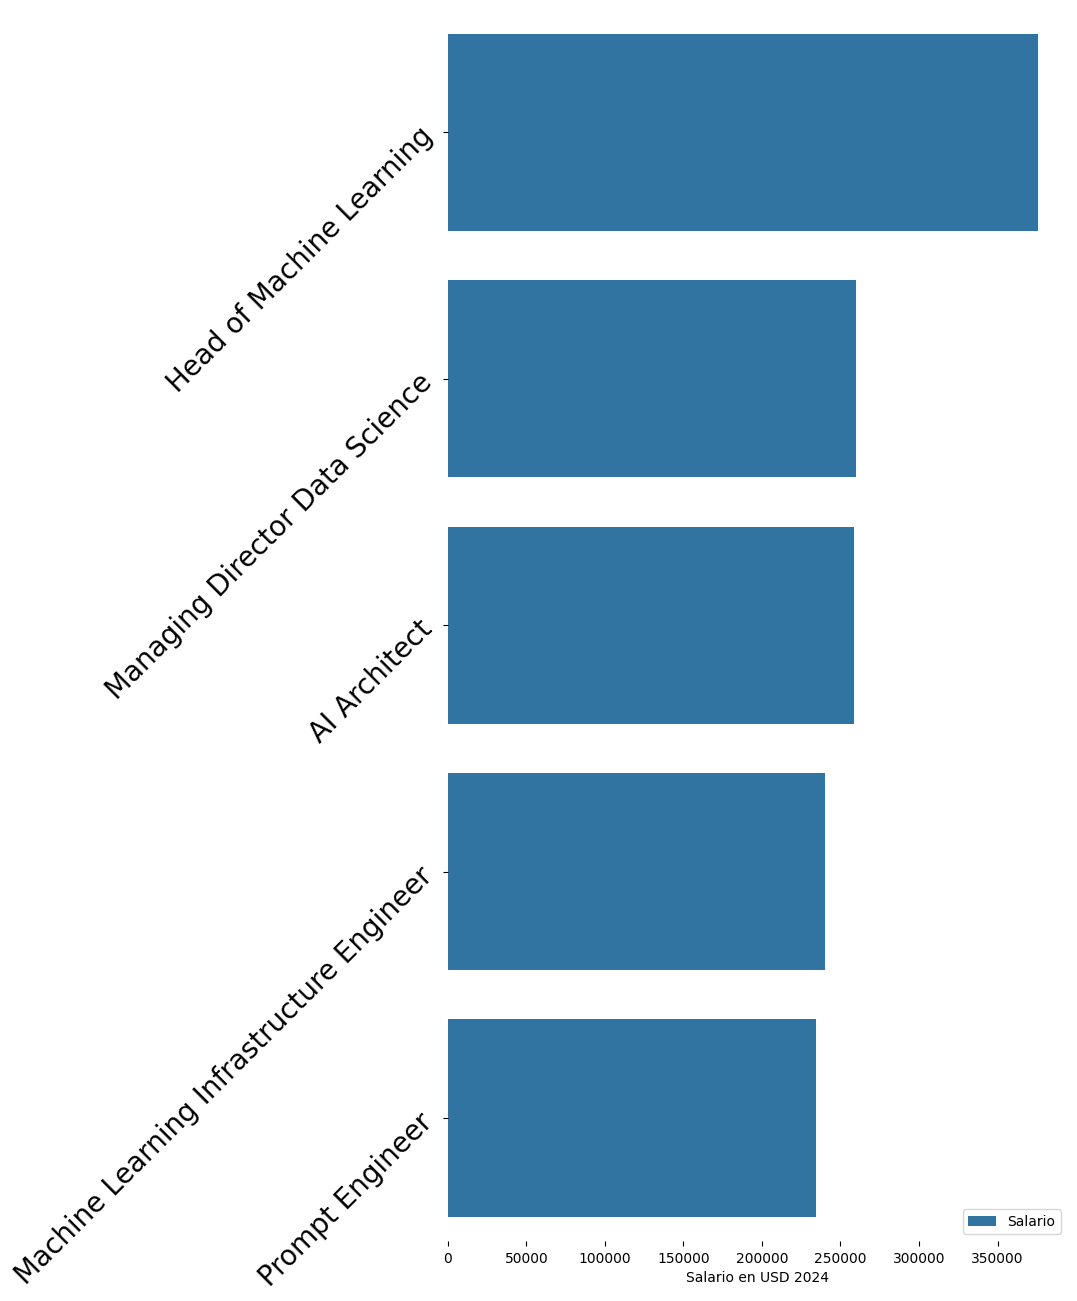

In [135]:
f, ax = plt.subplots(figsize=(8, 16))


mascara1 = (df_proc_filtrado['work_year'] == 2024)
df_res1 = df_proc_filtrado[mascara1]

df_res1 = df_res1.groupby(['job_title'])['salary_in_usd'].mean().reset_index()

df_res1.sort_values('salary_in_usd', ascending=False, inplace=True)
sb.barplot(x="salary_in_usd", y="job_title", data=df_res1.head(5),
            label="Salario")

ax.tick_params(axis='y', labelsize='large')
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Salario en USD 2024")
sb.despine(left=True, bottom=True)
plt.yticks(rotation=45, fontsize=20)

### Pregunta 2 ¿Cuales son los rangos salariales de los cargos mas representativos, en estados unidos y canada?

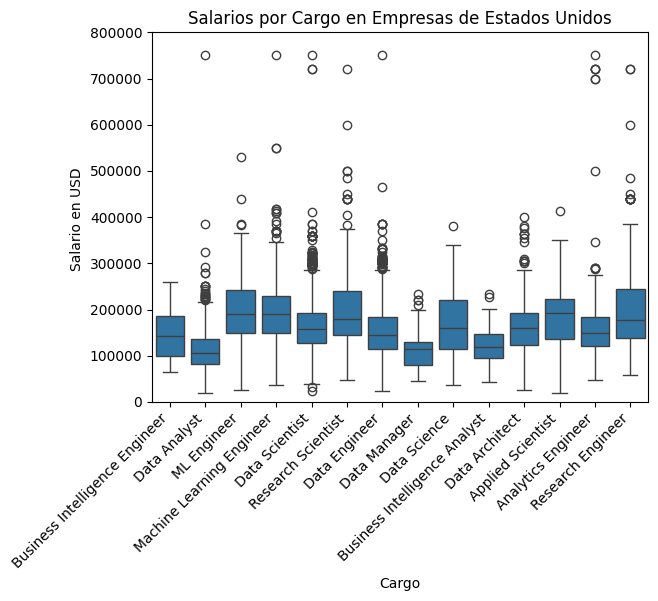

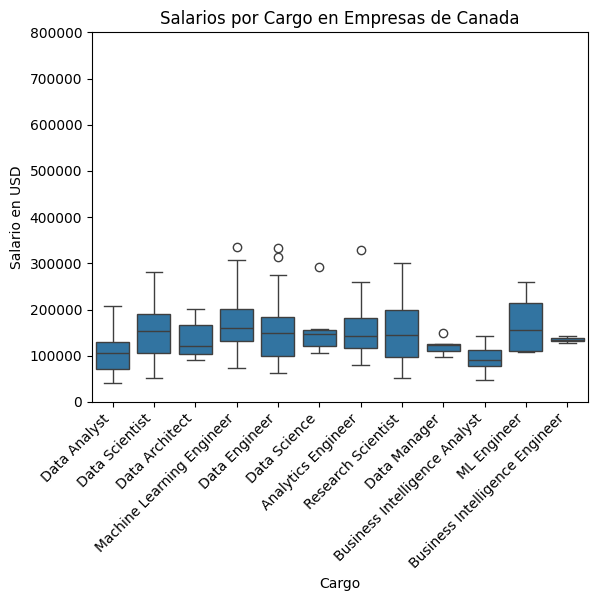

In [136]:
# Filtrar los trabajos relevantes que representen al menos el 1% de los datos
lista_trabajos_relevantes = df_proc_filtrado['job_title'].value_counts(normalize=True) >= 0.01
lista_trabajos_relevantes = lista_trabajos_relevantes[lista_trabajos_relevantes].index.tolist()
# Filtrar los datos cuyo 'job title' esté en la lista de trabajos relevantes
datos_trabajos_relevantes = df_proc_filtrado[df_proc_filtrado['job_title'].isin(lista_trabajos_relevantes)]

# Filtrar los datos para empresas en Norte America y Latinoamerica
datos_us = datos_trabajos_relevantes[datos_trabajos_relevantes['company_location'] == 'US']
datos_ca = datos_trabajos_relevantes[datos_trabajos_relevantes['company_location'] == 'CA']

boxplot_us = sb.boxplot(x='job_title', y='salary_in_usd', data=datos_us)
boxplot_us.set_title('Salarios por Cargo en Empresas de Estados Unidos')
boxplot_us.set_xlabel('Cargo')
boxplot_us.set_ylabel('Salario en USD ')
boxplot_us.set_ylim(0, 800000)
plt.xticks(rotation=45, ha='right')  
plt.show()

boxplot_ca = sb.boxplot(x='job_title', y='salary_in_usd', data=datos_ca)
boxplot_ca.set_title('Salarios por Cargo en Empresas de Canada')
boxplot_ca.set_xlabel('Cargo')
boxplot_ca.set_ylabel('Salario en USD')
boxplot_ca.set_ylim(0, 800000)
plt.xticks(rotation=45, ha='right')  
plt.show()


### Pregunta 3 ¿Cuales son los trabajos mas solicitados en en estados unidos y canada?

In [137]:
datos_us = df_proc_filtrado[df_proc_filtrado['company_location'] == 'US']
datos_ca = df_proc_filtrado[df_proc_filtrado['company_location'] == 'CA']

# Frecuencia de ofertas para cada trabajo en Estados unidos y Canada, tomar el top 10 y convertirlo a una lista de trabajos
frecuencia_trabajos_us = datos_us['job_title'].value_counts()
trabajos_solicitados_us = frecuencia_trabajos_us.head(8)
lista_trabajos_solicitados_us = list(trabajos_solicitados_us.keys())

frecuencia_trabajos_ca = datos_ca['job_title'].value_counts()
trabajos_solicitados_ca = frecuencia_trabajos_ca.head(8)
lista_trabajos_solicitados_ca = list(trabajos_solicitados_ca.keys())


print(f"Los 10 trabajos más solicitados en Estados unidos son: \n{lista_trabajos_solicitados_us}\n\n")
print(f"Los 10 trabajos más solicitados en Canada son: \n{lista_trabajos_solicitados_ca}")


Los 10 trabajos más solicitados en Estados unidos son: 
['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Research Scientist', 'Applied Scientist', 'Data Architect', 'Analytics Engineer']


Los 10 trabajos más solicitados en Canada son: 
['Data Scientist', 'Data Engineer', 'Machine Learning Engineer', 'Data Analyst', 'Analytics Engineer', 'Data Architect', 'Machine Learning Scientist', 'Business Intelligence Analyst']


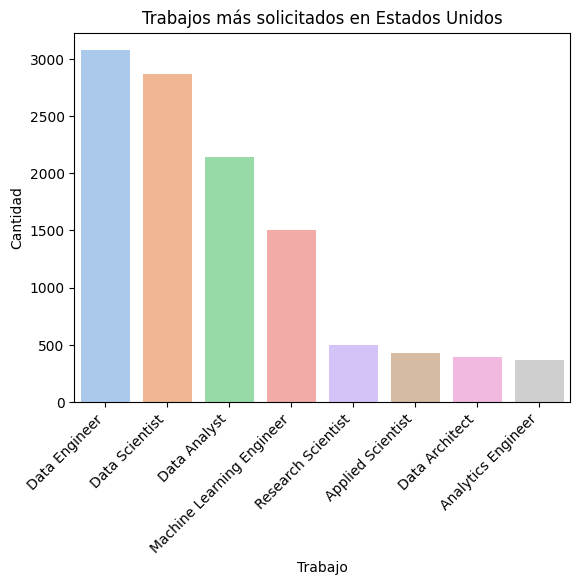

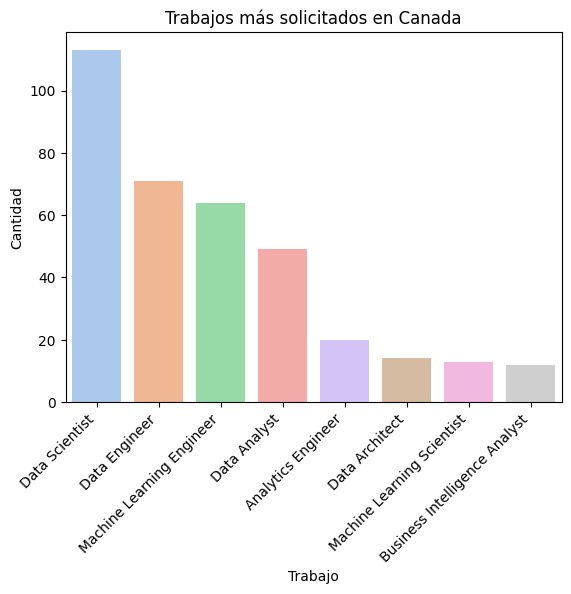

In [138]:
sb.barplot(x=lista_trabajos_solicitados_us, y=trabajos_solicitados_us.values, palette='pastel')
plt.title('Trabajos más solicitados en Estados Unidos')
plt.xlabel('Trabajo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right') 
plt.show() 


sb.barplot(x=lista_trabajos_solicitados_ca, y=trabajos_solicitados_ca.values, palette='pastel')
plt.title('Trabajos más solicitados en Canada')
plt.xlabel('Trabajo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')  
plt.show()


## Medidas de Dispersión

In [139]:
mascara1 = (df_proc_filtrado['work_year'] >= 2023)
df_proc_filtrado = df_proc_filtrado[mascara1]
df_num = df_proc_filtrado.select_dtypes(include=['number'])['salary_in_usd']

In [140]:
salario_desviacion_std = df_num.std()

In [141]:
salario_max= df_num.max() 

In [142]:
salario_min = df_num.min()

In [143]:
rango_salarial = df_num.max() - df_num.min()


In [144]:
rango_promedio =df_num.mean() + df_num.std()

In [145]:
rango_promedio_min = df_num.mean() - df_num.std()

In [146]:
riq = df_num.quantile(0.75) - df_num.quantile(0.25)

In [147]:
print(f" La desviación estándar del salario en USD es: {salario_desviacion_std}\n El salario máximo es: {salario_max}\n El salario mínimo es: {salario_min}\n El rango salarial es: {rango_salarial}\n El rango promedio es: {rango_promedio}\n El rango promedio minimo es: {rango_promedio_min}\n El rango intercuartil es: {riq}")

 La desviación estándar del salario en USD es: 66773.13775059603
 El salario máximo es: 800000
 El salario mínimo es: 20000
 El rango salarial es: 780000
 El rango promedio es: 224741.54639617226
 El rango promedio minimo es: 91195.27089498022
 El rango intercuartil es: 81500.0


## Distribuciones

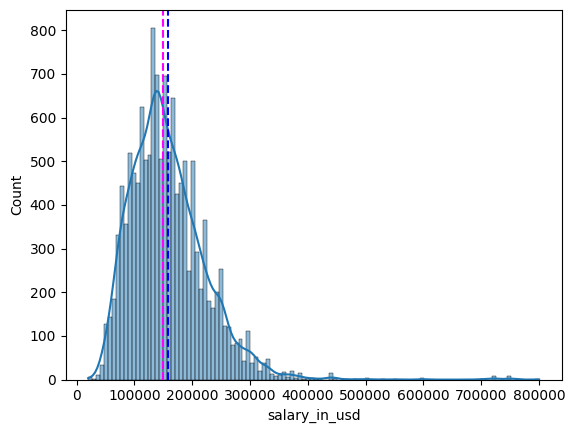

In [148]:
sb.histplot(data = df_proc_filtrado, x = 'salary_in_usd', kde = True)
plt.axvline(x = df_proc_filtrado.salary_in_usd.mean(), color = 'blue', linestyle = 'dashed')
plt.axvline(x = df_proc_filtrado.salary_in_usd.median(), color = 'magenta', linestyle = 'dashed')
plt.show()

Segun la ubicaciond e la compañia

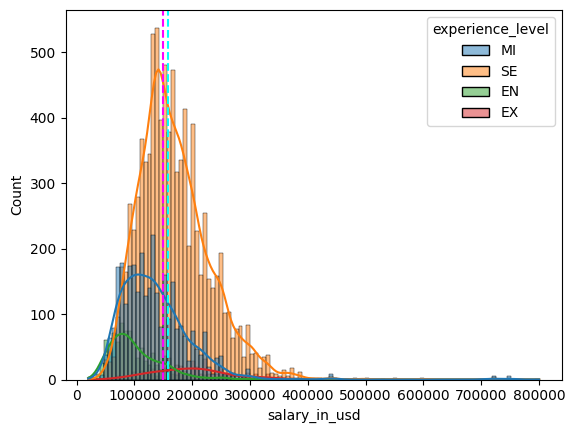

In [149]:
sb.histplot(data = df_proc_filtrado, x = 'salary_in_usd', kde = True, hue = 'experience_level')
plt.axvline(x = df_proc_filtrado.salary_in_usd.mean(), color = 'cyan', linestyle = 'dashed')
plt.axvline(x = df_proc_filtrado.salary_in_usd.median(), color = 'magenta', linestyle = 'dashed')
plt.show()

### Simulamos nulidad de datos

In [150]:
%run pandas-missing-extension.ipynb

In [151]:
df_proc_modelo = df_proc_filtrado.copy()

In [152]:
# Obtener el número total de filas y columnas
num_filas = df_proc_modelo.shape[0]

# Generar 100 índices de fila y columna aleatorios
indices_filas = np.random.choice(num_filas, 100)

# Insertar valores nulos en las ubicaciones aleatorias
for i in range(100):
    df_proc_modelo.iat[indices_filas[i], 3] = np.nan

In [153]:
df_proc_modelo.isnull().sum()

work_year               0
experience_level        0
job_title               0
salary_in_usd         100
employee_residence      0
remote_ratio            0
company_location        0
company_size            0
dtype: int64

In [154]:
nulos_por_columna = df_proc_modelo.isnull().sum() # suma los datos nulos
porcentaje_nulos_por_columna = round((nulos_por_columna / len(df_proc_modelo)) * 100,2)

nulos_df = pd.DataFrame({
    'Nombre de la Columna': nulos_por_columna.index,
    'Cantidad de Nulos': nulos_por_columna.values,
    'Porcentaje de Nulos (%)': porcentaje_nulos_por_columna.values
})
nulos_df

,Nombre de la Columna,Cantidad de Nulos,Porcentaje de Nulos (%)
0,work_year,0,0.00
1,experience_level,0,0.00
2,job_title,0,0.00
3,salary_in_usd,100,0.75
4,employee_residence,0,0.00
5,remote_ratio,0,0.00
6,company_location,0,0.00
7,company_size,0,0.00


In [155]:
df_proc_modelo.dtypes

work_year               int64
experience_level       object
job_title              object
salary_in_usd         float64
employee_residence     object
remote_ratio            int64
company_location       object
company_size           object
dtype: object

In [156]:


categorical_columns = df_proc_modelo.select_dtypes(include = 'object').columns
categorical_transformer = sklearn.compose.make_column_transformer((sklearn.preprocessing.OrdinalEncoder(),
                                                                   categorical_columns), remainder = 'passthrough')
# transformar cols categoricas, y lo que sobre, no hacer nada 
categorical_transformer


ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 Index(['experience_level', 'job_title', 'employee_residence',
       'company_location', 'company_size'],
      dtype='object'))])

In [157]:
categorical_columns

Index(['experience_level', 'job_title', 'employee_residence',
       'company_location', 'company_size'],
      dtype='object')

In [158]:
df_proc_modelo_categorico = pd.DataFrame(categorical_transformer.fit_transform(df_proc_modelo),
                                    columns = categorical_transformer.get_feature_names_out(),
                                    index = df_proc_modelo.index).rename(columns=lambda x: x.replace('ordinalencoder__', '')).rename(columns=lambda x: x.replace('remainder__', ''))
df_proc_modelo_categorico.head(5)

,experience_level,job_title,employee_residence,company_location,company_size,work_year,salary_in_usd,remote_ratio
4,2.0,74.0,16.0,1.0,1.0,2024.0,240000.0,0.0
5,2.0,74.0,16.0,1.0,1.0,2024.0,180000.0,0.0
6,3.0,26.0,16.0,1.0,1.0,2024.0,202800.0,0.0
7,3.0,26.0,16.0,1.0,1.0,2024.0,115000.0,0.0
10,3.0,37.0,2.0,0.0,1.0,2024.0,69230.0,0.0


In [159]:
knn_imputer = sklearn.impute.KNNImputer()
df_proc_modelo_knn_imputado = pd.DataFrame(knn_imputer.fit_transform(df_proc_modelo_categorico).round(),
                            columns = df_proc_modelo_categorico.columns,
                            index = df_proc_modelo_categorico.index)
df_proc_modelo_knn_imputado

,experience_level,job_title,employee_residence,company_location,company_size,work_year,salary_in_usd,remote_ratio
4,2.0,74.0,16.0,1.0,1.0,2024.0,240000.0,0.0
5,2.0,74.0,16.0,1.0,1.0,2024.0,180000.0,0.0
6,3.0,26.0,16.0,1.0,1.0,2024.0,202800.0,0.0
7,3.0,26.0,16.0,1.0,1.0,2024.0,115000.0,0.0
10,3.0,37.0,2.0,0.0,1.0,2024.0,69230.0,0.0
...,...,...,...,...,...,...,...,...
14594,3.0,100.0,16.0,1.0,0.0,2023.0,134500.0,0.0
14595,2.0,76.0,16.0,1.0,1.0,2023.0,130000.0,0.0
14596,2.0,76.0,16.0,1.0,1.0,2023.0,90000.0,0.0
14597,0.0,45.0,16.0,1.0,1.0,2023.0,160000.0,0.0


In [160]:
df_proc_modelo_knn_imputado.isnull().sum()

experience_level      0
job_title             0
employee_residence    0
company_location      0
company_size          0
work_year             0
salary_in_usd         0
remote_ratio          0
dtype: int64

In [161]:
df_proc_modelo_knn_imputado.describe()

,experience_level,job_title,employee_residence,company_location,company_size,work_year,salary_in_usd,remote_ratio
count,13371.000000,13371.000000,13371.000000,13371.000000,13371.000000,13371.000000,13371.000000,13371.000000
mean,2.495550,60.868746,15.569292,0.970010,0.958492,2023.417545,157971.031860,28.371102
std,0.856166,29.722930,2.411431,0.170567,0.206832,0.493173,66678.705665,45.042092
min,0.000000,0.000000,0.000000,0.000000,0.000000,2023.000000,20000.000000,0.000000
25%,2.000000,37.000000,16.000000,1.000000,1.000000,2023.000000,111350.000000,0.000000
50%,3.000000,45.000000,16.000000,1.000000,1.000000,2023.000000,149000.000000,0.000000
75%,3.000000,76.000000,16.000000,1.000000,1.000000,2024.000000,192500.000000,100.000000
max,3.000000,120.000000,17.000000,1.000000,2.000000,2024.000000,800000.000000,100.000000


In [162]:
pd.concat([df_proc_modelo_knn_imputado, df_proc_modelo.missing.create_shadow_matrix(True, False, suffix = '_imp', only_missing = True)], axis = 1)

,experience_level,job_title,employee_residence,company_location,company_size,work_year,salary_in_usd,remote_ratio,salary_in_usd_imp
4,2.0,74.0,16.0,1.0,1.0,2024.0,240000.0,0.0,False
5,2.0,74.0,16.0,1.0,1.0,2024.0,180000.0,0.0,False
6,3.0,26.0,16.0,1.0,1.0,2024.0,202800.0,0.0,False
7,3.0,26.0,16.0,1.0,1.0,2024.0,115000.0,0.0,False
10,3.0,37.0,2.0,0.0,1.0,2024.0,69230.0,0.0,False
...,...,...,...,...,...,...,...,...,...
14594,3.0,100.0,16.0,1.0,0.0,2023.0,134500.0,0.0,False
14595,2.0,76.0,16.0,1.0,1.0,2023.0,130000.0,0.0,False
14596,2.0,76.0,16.0,1.0,1.0,2023.0,90000.0,0.0,False
14597,0.0,45.0,16.0,1.0,1.0,2023.0,160000.0,0.0,False


In [163]:
df_concatenado_inputado = pd.concat([df_proc_modelo_knn_imputado, df_proc_modelo.missing.create_shadow_matrix(True, False, suffix = '_imp', only_missing = True)], axis = 1)


mascara1 = (df_concatenado_inputado['salary_in_usd_imp'] == True)
shadow_matrix1 = df_concatenado_inputado[mascara1]
shadow_matrix1

,experience_level,job_title,employee_residence,company_location,company_size,work_year,salary_in_usd,remote_ratio,salary_in_usd_imp
322,2.0,22.0,16.0,1.0,1.0,2024.0,126800.0,0.0,True
359,3.0,100.0,16.0,1.0,1.0,2024.0,212400.0,100.0,True
412,3.0,37.0,16.0,1.0,1.0,2024.0,146373.0,0.0,True
448,1.0,45.0,16.0,1.0,1.0,2024.0,181300.0,0.0,True
505,3.0,100.0,16.0,1.0,1.0,2024.0,190180.0,0.0,True
...,...,...,...,...,...,...,...,...,...
14420,3.0,18.0,16.0,1.0,1.0,2023.0,155300.0,0.0,True
14456,3.0,74.0,16.0,1.0,1.0,2023.0,197100.0,100.0,True
14538,3.0,76.0,16.0,1.0,1.0,2023.0,178086.0,0.0,True
14541,3.0,76.0,16.0,1.0,1.0,2023.0,178086.0,0.0,True


In [164]:
df_proc_modelo_knn_imputado.dtypes

experience_level      float64
job_title             float64
employee_residence    float64
company_location      float64
company_size          float64
work_year             float64
salary_in_usd         float64
remote_ratio          float64
dtype: object

In [165]:
df_proc_modelo['salary_in_usd'] = df_proc_modelo_knn_imputado['salary_in_usd']

In [166]:
df_proc_modelo.isnull().sum()

work_year             0
experience_level      0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## Modelo por experiencia y tamaño de compañia

In [167]:
df_encoded = pd.get_dummies(df_proc_modelo, columns=['experience_level','company_size'])
df_encoded = df_encoded.drop(columns=['job_title','company_location','employee_residence'], axis=1)
y = df_encoded['salary_in_usd'] #esta va ser lo que quiero predecir con los demas datos del data frame
df_encoded.drop(columns=['salary_in_usd'], inplace=True)

In [168]:
df_encoded.head(5)

,work_year,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,company_size_L,company_size_M,company_size_S
4,2024,0,False,False,True,False,False,True,False
5,2024,0,False,False,True,False,False,True,False
6,2024,0,False,False,False,True,False,True,False
7,2024,0,False,False,False,True,False,True,False
10,2024,0,False,False,False,True,False,True,False


In [169]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.25, random_state=42)

In [170]:
X_train.shape

(10028, 9)

In [171]:
y_test

2159      71958.0
10441    115000.0
5652     129000.0
3871     149800.0
7379     125009.0
           ...   
322      126800.0
10414    253000.0
1121     100500.0
4753     132000.0
5853      82500.0
Name: salary_in_usd, Length: 3343, dtype: float64

In [172]:
y_test.shape

(3343,)

In [173]:
#Importo el modelo
model = LinearRegression()

#Entreno el modelo utilizando los parámetros de entrenamiento
model.fit(X_train, y_train)

#Predigo sobre los datos de prueba
y_pred = model.predict(X_test)

#Me interesa también revisar la predicción del entrenamiento
y_predt = model.predict(X_train)

In [174]:
#Valor del MSE
mse = mean_absolute_error(y_train, y_predt)
print("Error cuadrático medio en el entrenamiento:", mse)

mse = mean_absolute_error(y_test, y_pred)
print("Error cuadrático medio en la prueba:", mse)

#Valor del R2
r2_train = r2_score(y_train, y_predt)
print("Coeficiente de determinación (R^2) en entrenamiento:", r2_train)

r2_test = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2) en prueba:", r2_test)

Error cuadrático medio en el entrenamiento: 46730.3598322727
Error cuadrático medio en la prueba: 45345.49409566266
Coeficiente de determinación (R^2) en entrenamiento: 0.10784524208853685
Coeficiente de determinación (R^2) en prueba: 0.11009355307494983


In [175]:
#Importo el modelo
tree_model = DecisionTreeRegressor(random_state=42)

#Entreno el modelo utilizando los parámetros de entrenamiento
tree_model.fit(X_train, y_train)

#Predigo sobre los datos de prueba
y_pred = tree_model.predict(X_test)

#Predigo sobre los datos de entrenamiento
y_predt = tree_model.predict(X_train)

In [176]:
#Valor del MSE
mse = mean_absolute_error(y_train, y_predt)
print("Error cuadrático medio en el entrenamiento:", mse)

mse = mean_absolute_error(y_test, y_pred)
print("Error cuadrático medio en la prueba:", mse)

#Valor del R2
r2_train = r2_score(y_train, y_predt)
print("Coeficiente de determinación (R^2) en entrenamiento:", r2_train)

r2_test = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2) en prueba:", r2_test)

Error cuadrático medio en el entrenamiento: 46512.80704852891
Error cuadrático medio en la prueba: 45302.633929074436
Coeficiente de determinación (R^2) en entrenamiento: 0.11374817944753468
Coeficiente de determinación (R^2) en prueba: 0.11207340845589675


## Modelo por ubicacion de la compañia y experiencia laboral

In [177]:
df_encoded = pd.get_dummies(df_proc_modelo, columns=['experience_level','company_location'])
df_encoded = df_encoded.drop(columns=['job_title','company_size','employee_residence'], axis=1)
y = df_encoded['salary_in_usd'] #esta va ser lo que quiero predecir con los demas datos del data frame
df_encoded.drop(columns=['salary_in_usd'], inplace=True)

In [178]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.25, random_state=42)

In [179]:
X_train.shape

(10028, 8)

In [180]:
X_train.shape

(10028, 8)

In [181]:
y_test

2159      71958.0
10441    115000.0
5652     129000.0
3871     149800.0
7379     125009.0
           ...   
322      126800.0
10414    253000.0
1121     100500.0
4753     132000.0
5853      82500.0
Name: salary_in_usd, Length: 3343, dtype: float64

In [182]:
y_test.shape

(3343,)

In [183]:
#Importo el modelo
model = LinearRegression()

#Entreno el modelo utilizando los parámetros de entrenamiento
model.fit(X_train, y_train)

#Predigo sobre los datos de prueba
y_pred = model.predict(X_test)

#Me interesa también revisar la predicción del entrenamiento
y_predt = model.predict(X_train)

In [184]:
#Valor del MSE
mse = mean_absolute_error(y_train, y_predt)
print("Error cuadrático medio en el entrenamiento:", mse)

mse = mean_absolute_error(y_test, y_pred)
print("Error cuadrático medio en la prueba:", mse)

#Valor del R2
r2_train = r2_score(y_train, y_predt)
print("Coeficiente de determinación (R^2) en entrenamiento:", r2_train)

r2_test = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2) en prueba:", r2_test)

Error cuadrático medio en el entrenamiento: 46763.65567662737
Error cuadrático medio en la prueba: 45386.498507476215
Coeficiente de determinación (R^2) en entrenamiento: 0.10767266417729571
Coeficiente de determinación (R^2) en prueba: 0.10824554896726046


In [185]:
#Importo el modelo
tree_model = DecisionTreeRegressor(random_state=42)

#Entreno el modelo utilizando los parámetros de entrenamiento
tree_model.fit(X_train, y_train)

#Predigo sobre los datos de prueba
y_pred = tree_model.predict(X_test)

#Predigo sobre los datos de entrenamiento
y_predt = tree_model.predict(X_train)

In [186]:
#Valor del MSE
mse = mean_absolute_error(y_train, y_predt)
print("Error cuadrático medio en el entrenamiento:", mse)

mse = mean_absolute_error(y_test, y_pred)
print("Error cuadrático medio en la prueba:", mse)

#Valor del R2
r2_train = r2_score(y_train, y_predt)
print("Coeficiente de determinación (R^2) en entrenamiento:", r2_train)

r2_test = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2) en prueba:", r2_test)

Error cuadrático medio en el entrenamiento: 46608.203330445845
Error cuadrático medio en la prueba: 45326.06125897956
Coeficiente de determinación (R^2) en entrenamiento: 0.11442202757146602
Coeficiente de determinación (R^2) en prueba: 0.10959982346979236


In [187]:
#Importo el modelo
tree_model = DecisionTreeRegressor(random_state=42, max_depth=2)

#Entreno el modelo utilizando los parámetros de entrenamiento
tree_model.fit(X_train, y_train)

#Predigo sobre los datos de prueba
y_pred = tree_model.predict(X_test)

#Predigo sobre los datos de entrenamiento
y_predt = tree_model.predict(X_train)

In [188]:
#Valor del MSE
mse = mean_absolute_error(y_train, y_predt)
print("Error cuadrático medio en el entrenamiento:", mse)

mse = mean_absolute_error(y_test, y_pred)
print("Error cuadrático medio en la prueba:", mse)

#Valor del R2
r2_train = r2_score(y_train, y_predt)
print("Coeficiente de determinación (R^2) en entrenamiento:", r2_train)

r2_test = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2) en prueba:", r2_test)

Error cuadrático medio en el entrenamiento: 47376.26217636682
Error cuadrático medio en la prueba: 45688.78338454484
Coeficiente de determinación (R^2) en entrenamiento: 0.09047671530726531
Coeficiente de determinación (R^2) en prueba: 0.0959458793567376
